In [1]:
import keras
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from PIL import Image
from tqdm import tqdm

In [2]:
size = 224
dataset = []
label = []

In [3]:
covid_train = os.listdir("../input/covidxray/train/COVID19/")

for i, image_name in tqdm(enumerate(covid_train)):
    image = cv2.imread("../input/covidxray/train/COVID19/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(0) 
    
    
covid_test = os.listdir("../input/covidxray/test/COVID19/") 

for i, image_name in tqdm(enumerate(covid_test)):
    image = cv2.imread("../input/covidxray/test/COVID19/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(0) 

1056it [00:54, 19.47it/s]
262it [00:16, 15.61it/s]


In [4]:
normal_train = os.listdir("../input/covidxray/train/NORMAL/")

for i, image_name in tqdm(enumerate(normal_train)):
    image = cv2.imread("../input/covidxray/train/NORMAL/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(1) 
    
    
normal_test = os.listdir("../input/covidxray/test/NORMAL/") 

for i, image_name in tqdm(enumerate(normal_test)):
    image = cv2.imread("../input/covidxray/test/NORMAL/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(1) 

1266it [01:24, 14.92it/s]
262it [00:16, 15.79it/s]


In [5]:
pneumonia_train = os.listdir("../input/covidxray/train/PNEUMONIA/")

for i, image_name in tqdm(enumerate(pneumonia_train)):
    image = cv2.imread("../input/covidxray/train/PNEUMONIA/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(2) 
    
    
pneumonia_test = os.listdir("../input/covidxray/test/PNEUMONIA/") 

for i, image_name in tqdm(enumerate(pneumonia_test)):
    image = cv2.imread("../input/covidxray/test/PNEUMONIA/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(2) 

1550it [00:54, 28.19it/s]
262it [00:07, 33.06it/s]


In [6]:
print(len(dataset))
print(len(label))

4658
4658


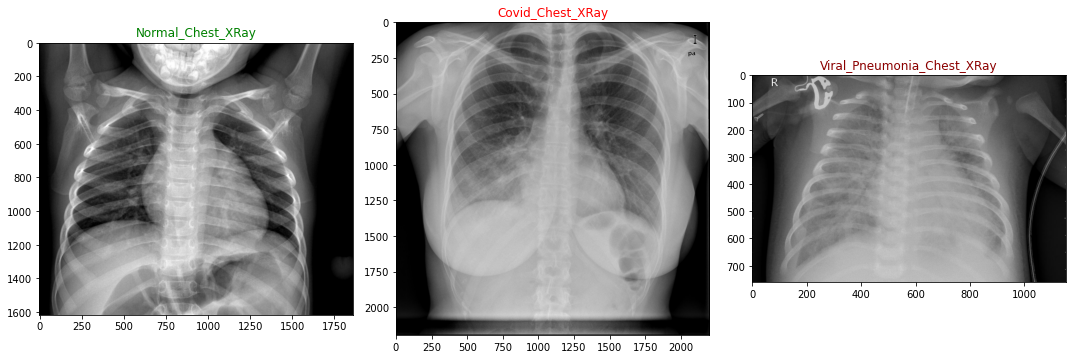

In [7]:
import cv2 as cv
fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

im_normal = cv.imread('../input/covidxray/train/NORMAL/NORMAL(100).jpg')
ax1.imshow(im_normal)
ax1.set_title('Normal_Chest_XRay', color = 'green')


im_covid = cv.imread('../input/covidxray/train/COVID19/16664_1_1.jpg')
ax2.imshow(im_covid)
ax2.set_title('Covid_Chest_XRay', color = 'red')

im_pneumonia = cv.imread('../input/covidxray/train/PNEUMONIA/PNEUMONIA(0).jpg')
ax3.imshow(im_pneumonia)
ax3.set_title('Viral_Pneumonia_Chest_XRay', color = 'darkred')

plt.tight_layout()

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense,  Dropout
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

classes_number=3 #Number of classes
input_tensor=Input(shape=(224,224,3))

**1. DENSENET201**

In [11]:
## Splitting the data
np.random.seed(42)

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [14]:
from tensorflow.keras.applications import ResNet50V2, DenseNet201, InceptionV3, Xception, VGG19, InceptionResNetV2,ResNet152V2,ResNet50,MobileNet,MobileNetV2,NASNetMobile

In [15]:
input_shape = (224,224,3)

base_model = DenseNet201(weights = 'imagenet', include_top = False, input_shape = input_shape)

x = base_model.output         
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x= tf.keras.layers.Flatten()(x)

x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

x= Dense(32,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

output = Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs = base_model.input, outputs = output)

for layer in model.layers[:-12]:
    layer.trainable=False
    
for layer in model.layers[-12:]:
    layer.trainable=True

optimizer = Adam()
early_stop = EarlyStopping(monitor='val_loss', patience=5 , verbose=1, mode='min', restore_best_weights = True)
callbacks = [early_stop]

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 25s 515ms/step - loss: 0.6758 - accuracy: 0.7632 - val_loss: 1.4717 - val_accuracy: 0.7189
Epoch 2/100
30/30 [==============================] - 10s 344ms/step - loss: 0.2621 - accuracy: 0.9109 - val_loss: 0.4048 - val_accuracy: 0.8766
Epoch 3/100
30/30 [==============================] - 10s 343ms/step - loss: 0.2062 - accuracy: 0.9336 - val_loss: 0.2321 - val_accuracy: 0.9152
Epoch 4/100
30/30 [==============================] - 10s 345ms/step - loss: 0.1507 - accuracy: 0.9504 - val_loss: 0.1890 - val_accuracy: 0.9303
Epoch 5/100
30/30 [==============================] - 10s 343ms/step - loss: 0.1215 - accuracy: 0.9621 - val_loss: 0.1636 - val_accuracy: 0.9410
Epoch 6/100
30/30 [==============================] - 10s 344ms/step - loss: 0.1125 - accuracy: 0.9632 - val_loss: 0.1503 - val_accuracy: 0.9431
Epoch 7/100
3

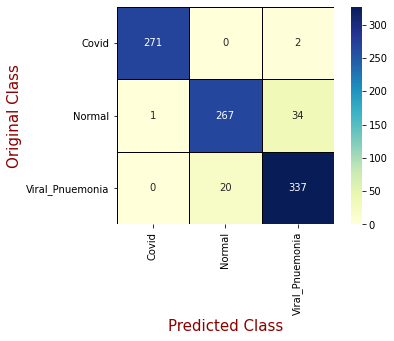

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       273
           1       0.93      0.88      0.91       302
           2       0.90      0.94      0.92       357

    accuracy                           0.94       932
   macro avg       0.94      0.94      0.94       932
weighted avg       0.94      0.94      0.94       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 349ms/step - loss: 0.0446 - accuracy: 0.9877 - val_loss: 0.1364 - val_accuracy: 0.9560
Epoch 2/100
30/30 [==============================] - 10s 344ms/step - loss: 0.0464 - accuracy: 0.9863 - val_loss: 0.2042 - val_accuracy: 0.9335
Epoch 3/100
30/30 [==============================] - 10s 343ms/step - loss: 0.0479 - accuracy: 0.9863 - val_loss: 0.1485 - val_accuracy: 0.9560
Epoch 4/100
30/30 [========================

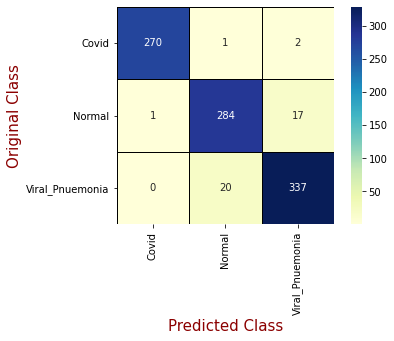

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       273
           1       0.93      0.94      0.94       302
           2       0.95      0.94      0.95       357

    accuracy                           0.96       932
   macro avg       0.96      0.96      0.96       932
weighted avg       0.96      0.96      0.96       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 348ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.1603 - val_accuracy: 0.9464
Epoch 2/100
30/30 [==============================] - 10s 345ms/step - loss: 0.0510 - accuracy: 0.9823 - val_loss: 0.1440 - val_accuracy: 0.9453
Epoch 3/100
30/30 [==============================] - 10s 343ms/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.1648 - val_accuracy: 0.9453
Epoch 4/100
30/30 [========================

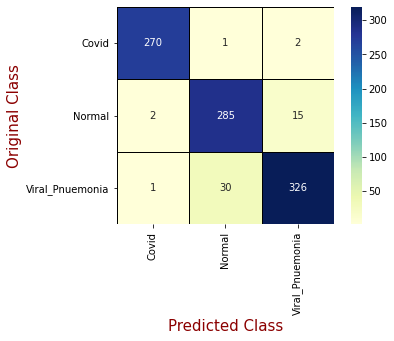

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       273
           1       0.90      0.94      0.92       302
           2       0.95      0.91      0.93       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 349ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.1551 - val_accuracy: 0.9464
Epoch 2/100
30/30 [==============================] - 10s 343ms/step - loss: 0.0402 - accuracy: 0.9860 - val_loss: 0.2133 - val_accuracy: 0.9356
Epoch 3/100
30/30 [==============================] - 10s 348ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.1813 - val_accuracy: 0.9367
Epoch 4/100
30/30 [========================

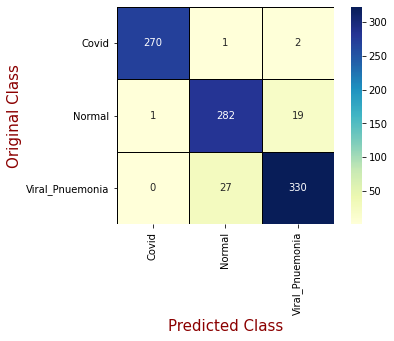

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       273
           1       0.91      0.93      0.92       302
           2       0.94      0.92      0.93       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 349ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.1516 - val_accuracy: 0.9517
Epoch 2/100
30/30 [==============================] - 10s 344ms/step - loss: 0.0406 - accuracy: 0.9858 - val_loss: 0.1616 - val_accuracy: 0.9517
Epoch 3/100
30/30 [==============================] - 10s 347ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.1840 - val_accuracy: 0.9474
Epoch 4/100
30/30 [========================

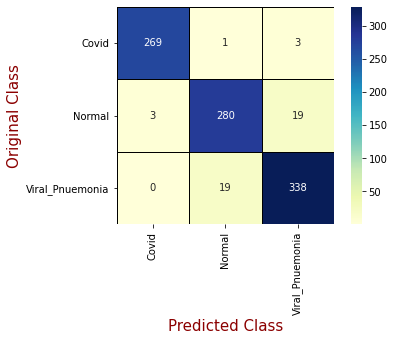

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       273
           1       0.93      0.93      0.93       302
           2       0.94      0.95      0.94       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
Estimated Accuracy 95.60


In [16]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

callbacks = [early_stop]

n_folds = 5
cv_scores = list()

for _ in range(n_folds):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20)
    
    #evaluate
    print("##################################################################################################")
    print("CV Fold starts here....")
    
    history = model.fit(np.array(X_train),   
                         y_train, 
                         batch_size = 128, 
                         verbose = 1, 
                         epochs = 100,      
                         validation_data=(np.array(X_test), y_test),
                         shuffle = False,
                         callbacks=callbacks
                         )
    val_acc = model.evaluate((np.array(X_test)), np.array(y_test))[1]*100
    cv_scores.append(val_acc)

    Y_pred_dense = model.predict(np.array(X_test))
    y_pred_dense = np.argmax(Y_pred_dense, axis=1)
    y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

    cnf_matrix = confusion_matrix(y_classes, y_pred_dense)
    cm = pd.DataFrame(cnf_matrix, columns = ['Covid', 'Normal', 'Viral_Pnuemonia'], 
                  index = ['Covid', 'Normal', 'Viral_Pnuemonia'])

    font = {'family': 'times new roman',
            'color':  'darkred',
            'weight': 'normal',
            'size': 15,
        }

    heat_map = sns.heatmap(cm, annot = True, square = True, linewidths= 0.5, linecolor= 'black',
                       cmap = 'YlGnBu', fmt = 'g', robust = True)

    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 90)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation = 0)
    plt.xlabel('Predicted Class', fontdict= font)
    plt.ylabel('Original Class', fontdict= font)
    plt.show()

    print(classification_report(y_classes, y_pred_dense))
    print("........CV Fold ends")
    
print("================================================================================================================")    
print('Estimated Accuracy %.2f' % (np.max(cv_scores)))        

In [17]:
model.save("DenseNet201.h5")

**2. VGG19**

In [18]:
base_model = VGG19(weights = 'imagenet', include_top = False, input_shape = input_shape)

x = base_model.output         
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x= tf.keras.layers.Flatten()(x)

x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

x= Dense(32,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

output = Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs = base_model.input, outputs = output)

for layer in model.layers[:-12]:
    layer.trainable=False
    
for layer in model.layers[-12:]:
    layer.trainable=True

optimizer = Adam()
early_stop = EarlyStopping(monitor='val_loss', patience=5 , verbose=1, mode='min', restore_best_weights = True)
callbacks = [early_stop]

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])   

80142336/80134624 [==============================] - 1s 0us/step


##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 15s 383ms/step - loss: 0.6356 - accuracy: 0.7705 - val_loss: 1.1651 - val_accuracy: 0.8723
Epoch 2/100
30/30 [==============================] - 10s 330ms/step - loss: 0.1591 - accuracy: 0.9512 - val_loss: 0.4977 - val_accuracy: 0.9120
Epoch 3/100
30/30 [==============================] - 10s 331ms/step - loss: 0.1220 - accuracy: 0.9586 - val_loss: 0.2802 - val_accuracy: 0.9292
Epoch 4/100
30/30 [==============================] - 10s 329ms/step - loss: 0.0939 - accuracy: 0.9759 - val_loss: 0.2216 - val_accuracy: 0.9388
Epoch 5/100
30/30 [==============================] - 10s 330ms/step - loss: 0.0717 - accuracy: 0.9763 - val_loss: 0.1817 - val_accuracy: 0.9496
Epoch 6/100
30/30 [==============================] - 10s 329ms/step - loss: 0.0589 - accuracy: 0.9846 - val_loss: 0.1686 - val_accuracy: 0.9496
Epoch 7/100
3

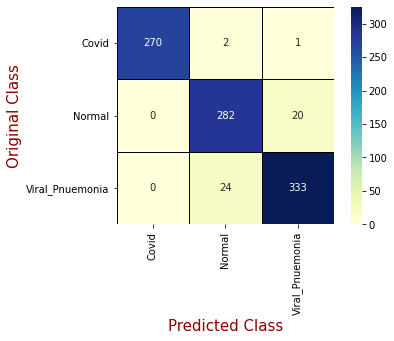

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       273
           1       0.92      0.93      0.92       302
           2       0.94      0.93      0.94       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 334ms/step - loss: 0.0321 - accuracy: 0.9938 - val_loss: 0.1760 - val_accuracy: 0.9474
Epoch 2/100
30/30 [==============================] - 10s 328ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.1922 - val_accuracy: 0.9474
Epoch 3/100
30/30 [==============================] - 10s 328ms/step - loss: 0.0276 - accuracy: 0.9928 - val_loss: 0.2017 - val_accuracy: 0.9496
Epoch 4/100
30/30 [========================

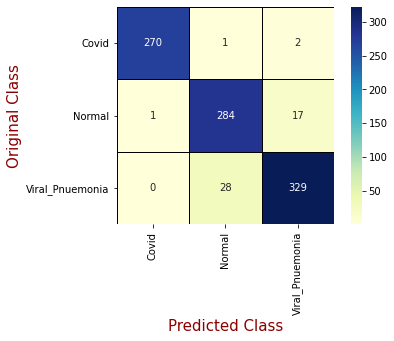

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       273
           1       0.91      0.94      0.92       302
           2       0.95      0.92      0.93       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 334ms/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.2131 - val_accuracy: 0.9464
Epoch 2/100
30/30 [==============================] - 10s 329ms/step - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.1817 - val_accuracy: 0.9474
Epoch 3/100
30/30 [==============================] - 10s 329ms/step - loss: 0.0199 - accuracy: 0.9954 - val_loss: 0.1899 - val_accuracy: 0.9539
Epoch 4/100
30/30 [========================

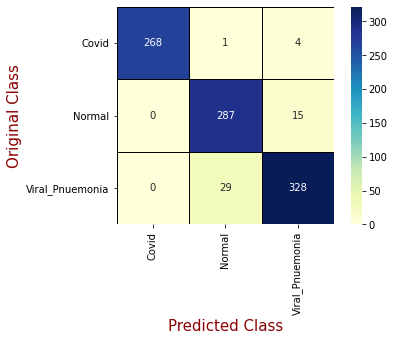

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       273
           1       0.91      0.95      0.93       302
           2       0.95      0.92      0.93       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 334ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 0.1807 - val_accuracy: 0.9517
Epoch 2/100
30/30 [==============================] - 10s 328ms/step - loss: 0.0170 - accuracy: 0.9957 - val_loss: 0.1994 - val_accuracy: 0.9506
Epoch 3/100
30/30 [==============================] - 10s 328ms/step - loss: 0.0193 - accuracy: 0.9954 - val_loss: 0.2149 - val_accuracy: 0.9485
Epoch 4/100
30/30 [========================

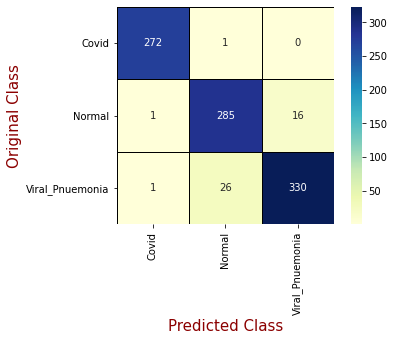

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       273
           1       0.91      0.94      0.93       302
           2       0.95      0.92      0.94       357

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 10s 335ms/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.2057 - val_accuracy: 0.9549
Epoch 2/100
30/30 [==============================] - 10s 329ms/step - loss: 0.0254 - accuracy: 0.9936 - val_loss: 0.2026 - val_accuracy: 0.9539
Epoch 3/100
30/30 [==============================] - 10s 329ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 0.2389 - val_accuracy: 0.9453
Epoch 4/100
30/30 [========================

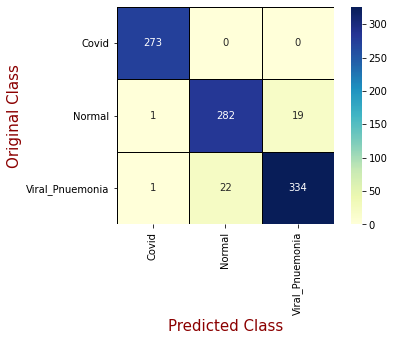

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       273
           1       0.93      0.93      0.93       302
           2       0.95      0.94      0.94       357

    accuracy                           0.95       932
   macro avg       0.96      0.96      0.96       932
weighted avg       0.95      0.95      0.95       932

........CV Fold ends
Estimated Accuracy 95.39


In [20]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

callbacks = [early_stop]

n_folds = 5
cv_scores = list()

for _ in range(n_folds):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20)
    
    #evaluate
    print("##################################################################################################")
    print("CV Fold starts here....")
    
    history = model.fit(np.array(X_train),   
                         y_train, 
                         batch_size = 128, 
                         verbose = 1, 
                         epochs = 100,      
                         validation_data=(np.array(X_test), y_test),
                         shuffle = False,
                         callbacks=callbacks
                         )
    val_acc = model.evaluate((np.array(X_test)), np.array(y_test))[1]*100
    cv_scores.append(val_acc)

    Y_pred_vgg = model.predict(np.array(X_test))
    y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
    y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

    cnf_matrix = confusion_matrix(y_classes, y_pred_vgg)
    cm = pd.DataFrame(cnf_matrix, columns = ['Covid', 'Normal', 'Viral_Pnuemonia'], 
                  index = ['Covid', 'Normal', 'Viral_Pnuemonia'])

    font = {'family': 'times new roman',
            'color':  'darkred',
            'weight': 'normal',
            'size': 15,
        }

    heat_map = sns.heatmap(cm, annot = True, square = True, linewidths= 0.5, linecolor= 'black',
                       cmap = 'YlGnBu', fmt = 'g', robust = True)

    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 90)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation = 0)
    plt.xlabel('Predicted Class', fontdict= font)
    plt.ylabel('Original Class', fontdict= font)
    plt.show()

    print(classification_report(y_classes, y_pred_vgg))
    print("........CV Fold ends")
    
print("================================================================================================================")    
print('Estimated Accuracy %.2f' % (np.max(cv_scores)))        

In [ ]:
model.save("VGG19.h5")

**3. ResNet50**

In [25]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = input_shape)

x = base_model.output         
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x= tf.keras.layers.Flatten()(x)

x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

x= Dense(32,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

output = Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs = base_model.input, outputs = output)

for layer in model.layers[:-12]:
    layer.trainable=False
    
for layer in model.layers[-12:]:
    layer.trainable=True

optimizer = Adam()
early_stop = EarlyStopping(monitor='val_loss', patience=5 , verbose=1, mode='min', restore_best_weights = True)
callbacks = [early_stop]

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])   

##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 11s 264ms/step - loss: 3.6038 - accuracy: 0.4431 - val_loss: 0.4572 - val_accuracy: 0.8348
Epoch 2/100
30/30 [==============================] - 7s 229ms/step - loss: 1.2005 - accuracy: 0.7476 - val_loss: 0.4120 - val_accuracy: 0.8863
Epoch 3/100
30/30 [==============================] - 7s 230ms/step - loss: 0.9322 - accuracy: 0.7992 - val_loss: 0.3018 - val_accuracy: 0.9045
Epoch 4/100
30/30 [==============================] - 7s 227ms/step - loss: 0.6717 - accuracy: 0.8407 - val_loss: 0.3065 - val_accuracy: 0.9077
Epoch 5/100
30/30 [==============================] - 7s 228ms/step - loss: 0.6315 - accuracy: 0.8624 - val_loss: 0.2727 - val_accuracy: 0.9174
Epoch 6/100
30/30 [==============================] - 7s 228ms/step - loss: 0.5581 - accuracy: 0.8632 - val_loss: 0.2545 - val_accuracy: 0.9206
Epoch 7/100
30/30 

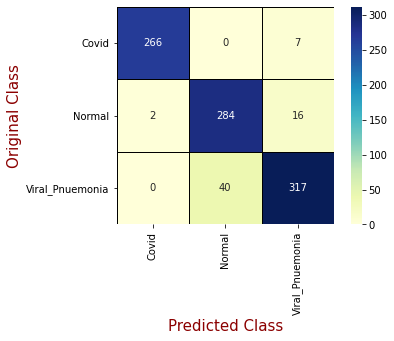

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       273
           1       0.88      0.94      0.91       302
           2       0.93      0.89      0.91       357

    accuracy                           0.93       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.93      0.93       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 7s 235ms/step - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.1889 - val_accuracy: 0.9260
Epoch 2/100
30/30 [==============================] - 7s 228ms/step - loss: 0.2264 - accuracy: 0.9147 - val_loss: 0.1940 - val_accuracy: 0.9217
Epoch 3/100
30/30 [==============================] - 7s 227ms/step - loss: 0.2264 - accuracy: 0.9179 - val_loss: 0.2133 - val_accuracy: 0.9152
Epoch 4/100
30/30 [===========================

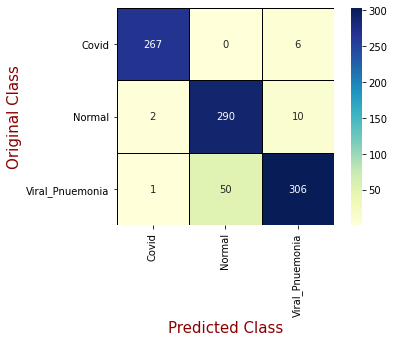

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       273
           1       0.85      0.96      0.90       302
           2       0.95      0.86      0.90       357

    accuracy                           0.93       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.93      0.93       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 7s 232ms/step - loss: 0.2192 - accuracy: 0.9208 - val_loss: 0.2130 - val_accuracy: 0.9174
Epoch 2/100
30/30 [==============================] - 7s 227ms/step - loss: 0.2185 - accuracy: 0.9176 - val_loss: 0.2066 - val_accuracy: 0.9206
Epoch 3/100
30/30 [==============================] - 7s 228ms/step - loss: 0.2183 - accuracy: 0.9155 - val_loss: 0.1900 - val_accuracy: 0.9238
Epoch 4/100
30/30 [===========================

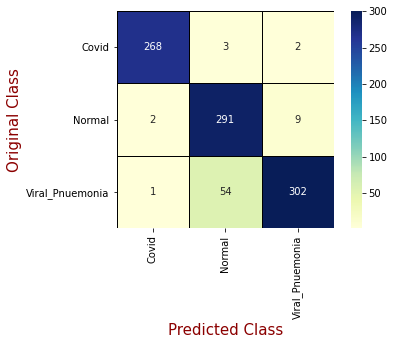

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       273
           1       0.84      0.96      0.90       302
           2       0.96      0.85      0.90       357

    accuracy                           0.92       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.92      0.92       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 7s 233ms/step - loss: 0.2094 - accuracy: 0.9192 - val_loss: 0.1909 - val_accuracy: 0.9217
Epoch 2/100
30/30 [==============================] - 7s 227ms/step - loss: 0.2304 - accuracy: 0.9224 - val_loss: 0.2168 - val_accuracy: 0.9163
Epoch 3/100
30/30 [==============================] - 7s 228ms/step - loss: 0.2140 - accuracy: 0.9240 - val_loss: 0.2122 - val_accuracy: 0.9142
Epoch 4/100
30/30 [===========================

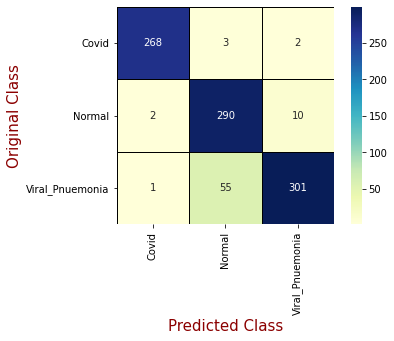

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       273
           1       0.83      0.96      0.89       302
           2       0.96      0.84      0.90       357

    accuracy                           0.92       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.92      0.92       932

........CV Fold ends
##################################################################################################
CV Fold starts here....
Epoch 1/100
30/30 [==============================] - 7s 232ms/step - loss: 0.2177 - accuracy: 0.9249 - val_loss: 0.2041 - val_accuracy: 0.9174
Epoch 2/100
30/30 [==============================] - 7s 227ms/step - loss: 0.2202 - accuracy: 0.9211 - val_loss: 0.2632 - val_accuracy: 0.9002
Epoch 3/100
30/30 [==============================] - 7s 229ms/step - loss: 0.2310 - accuracy: 0.9184 - val_loss: 0.2017 - val_accuracy: 0.9174
Epoch 4/100
30/30 [===========================

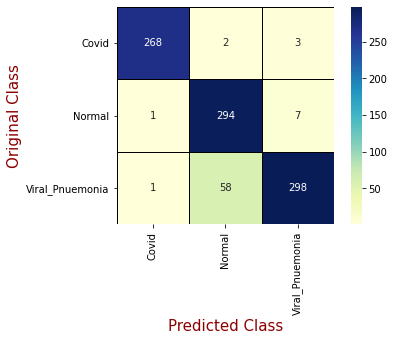

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       273
           1       0.83      0.97      0.90       302
           2       0.97      0.83      0.90       357

    accuracy                           0.92       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.92      0.92       932

........CV Fold ends
Estimated Accuracy 93.03


In [26]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

callbacks = [early_stop]

n_folds = 5
cv_scores = list()

for _ in range(n_folds):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20)
    
    #evaluate
    print("##################################################################################################")
    print("CV Fold starts here....")
    
    history = model.fit(np.array(X_train),   
                         y_train, 
                         batch_size = 128, 
                         verbose = 1, 
                         epochs = 100,      
                         validation_data=(np.array(X_test), y_test),
                         shuffle = False,
                         callbacks=callbacks
                         )
    val_acc = model.evaluate((np.array(X_test)), np.array(y_test))[1]*100
    cv_scores.append(val_acc)

    Y_pred_res = model.predict(np.array(X_test))
    y_pred_res = np.argmax(Y_pred_res, axis=1)
    y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

    cnf_matrix = confusion_matrix(y_classes, y_pred_res)
    cm = pd.DataFrame(cnf_matrix, columns = ['Covid', 'Normal', 'Viral_Pnuemonia'], 
                  index = ['Covid', 'Normal', 'Viral_Pnuemonia'])

    font = {'family': 'times new roman',
            'color':  'darkred',
            'weight': 'normal',
            'size': 15,
        }

    heat_map = sns.heatmap(cm, annot = True, square = True, linewidths= 0.5, linecolor= 'black',
                       cmap = 'YlGnBu', fmt = 'g', robust = True)

    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 90)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation = 0)
    plt.xlabel('Predicted Class', fontdict= font)
    plt.ylabel('Original Class', fontdict= font)
    plt.show()

    print(classification_report(y_classes, y_pred_res))
    print("........CV Fold ends")
    
print("================================================================================================================")    
print('Estimated Accuracy %.2f' % (np.max(cv_scores)))        

In [27]:
model.save("ResNet50.h5")